In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('railway_new.csv')

In [3]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,12/8/2023,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,1/1/2024,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,12/16/2023,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,1/1/2024,9:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,12/19/2023,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,1/2/2024,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,12/20/2023,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,1/1/2024,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,12/27/2023,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,1/1/2024,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [4]:
# Replace "Signal failure" with "Signal Failure"
df['Reason for Delay'].replace({'Signal failure' : 'Signal Failure'}, inplace=True)

C:\Users\Davi PC\AppData\Local\Temp\ipykernel_14416\3490173537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Reason for Delay'].replace({'Signal failure' : 'Signal Failure'}, inplace=True)


In [5]:
# Check for duplicates
df.duplicated().value_counts()

False    31653
Name: count, dtype: int64

### 1.	What is the total revenue generated from all ticket sales?

In [6]:
totalRevenue = df['Price'].sum()
print(f"The total revenue generated for all ticket sale is: ${totalRevenue:,}")

The total revenue generated for all ticket sale is: $741,921


### 2.	Which purchase type (Online or Station) is more popular among passengers?

In [7]:
PurchaseType = df['Purchase Type'].value_counts().sort_values(ascending=False)
print(f"The most purchase type is {PurchaseType.index[0]} with {PurchaseType.values[0]:,} sales")

The most purchase type is Online with 18,521 sales


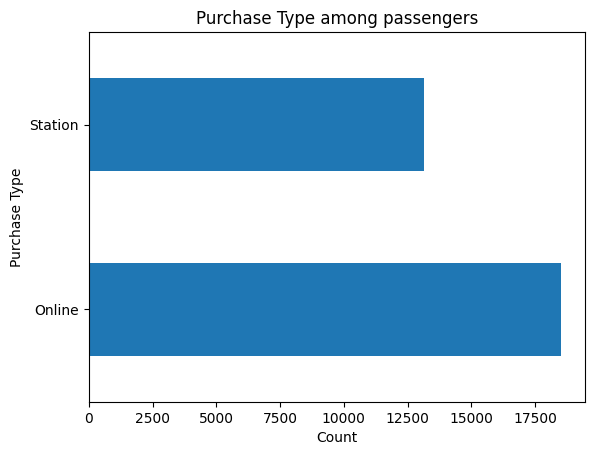

In [8]:
PurchaseType.plot(kind='barh')
plt.title('Purchase Type among passengers')
plt.xlabel('Count')
plt.ylabel('Purchase Type')
plt.show()

### 3.	What are the top 10 most popular routes based on ticket sales volume?

In [9]:
data = df.groupby(['Departure Station', 'Arrival Destination']).size()
popularRoutes = data.sort_values(ascending=False)
print(popularRoutes.head(10))

Departure Station      Arrival Destination  
Manchester Piccadilly  Liverpool Lime Street    4628
London Euston          Birmingham New Street    4209
London Kings Cross     York                     3922
London Paddington      Reading                  3873
London St Pancras      Birmingham New Street    3471
Liverpool Lime Street  Manchester Piccadilly    3002
                       London Euston            1097
London Euston          Manchester Piccadilly     712
Birmingham New Street  London St Pancras         702
London Paddington      Oxford                    485
dtype: int64


### 4.	What is the average ticket price by ticket class (Standard vs First)?

In [13]:
averageTicketClass = df.groupby('Ticket Class')['Price'].mean()
print(f"""The average ticket price for {averageTicketClass.index[0]} is ${averageTicketClass.values[0]:.2f} and
the average ticket price for {averageTicketClass.index[1]} is ${averageTicketClass.values[1]:.2f}""")

The average ticket price for First Class is $48.86 and
the average ticket price for Standard is $20.72


### 5.	Does the ticket type (Advance, Anytime, etc.) affect the average ticket price?

In [15]:
averageTicketType = df.groupby('Ticket Type')['Price'].mean().sort_values()
print(f"""The lowest ticket type is {averageTicketType.index[0]} with the average price of ${averageTicketType.values[0]:.2f} 
followed by ticket type is {averageTicketType.index[1]} with the average price of ${averageTicketType.values[1]:.2f} 
followed by ticket type is {averageTicketType.index[2]} with the average price of ${averageTicketType.values[2]:.2f}""")

The lowest ticket type is Advance with the average price of $17.61 
followed by ticket type is Off-Peak with the average price of $25.52 
followed by ticket type is Anytime with the average price of $39.20


### 6.	Which routes have the highest average ticket prices?

In [18]:
highestPrice = df.groupby(['Departure Station', 'Arrival Destination'])['Price'].mean().sort_values(ascending=False)
print(f"""The route with the highest average is {highestPrice.index[0][0]} departure station and {highestPrice.index[0][1]} 
arrival destination with average price of ${highestPrice.values[0]:.2f}""") 


The route with the highest average is Manchester Piccadilly departure station and London Paddington 
arrival destination with average price of $114.11


### 7.	What percentage of journeys were delayed versus on time?

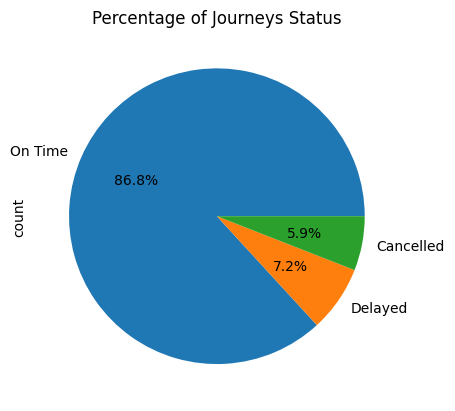

In [13]:
journeyStatus = df['Journey Status'].value_counts()
journeyStatus.plot(kind='pie', autopct = '%1.1f%%')
plt.title('Percentage of Journeys Status')
plt.show()

### 8.	Which routes experienced the most delays?

In [19]:
journeydelay = df[(df['Journey Status'] == 'Delayed')]
delayedRoute = journeydelay.groupby(['Departure Station', 'Arrival Destination']).size().sort_values(ascending=False)
print(f"""The route with most delay is {delayedRoute.index[0][0]} departure station and {delayedRoute.index[0][1]} 
arrival destination with {delayedRoute.values[0]} flight delayed""")

The route with most delay is Liverpool Lime Street departure station and London Euston 
arrival destination with 780 flight delayed


### 9.	What are the top 5 reasons for delays across all journeys?

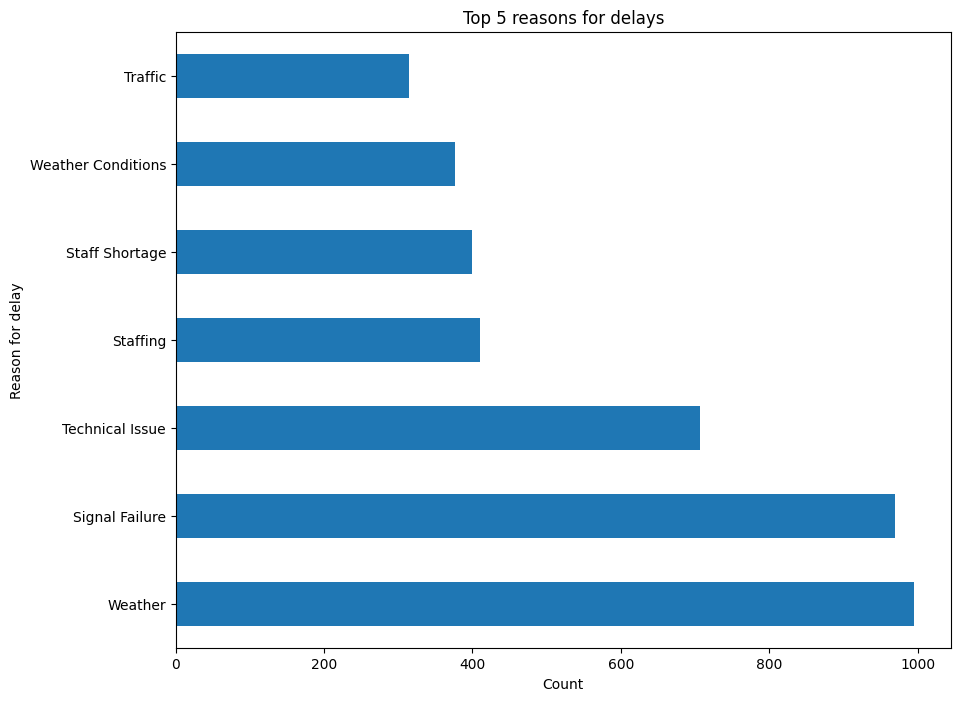

In [15]:
reasonForDelay = df['Reason for Delay'].value_counts().sort_values(ascending=False)
reasonForDelay.plot(kind='barh', figsize=(10,8))
plt.title("Top 5 reasons for delays")
plt.xlabel('Count')
plt.ylabel('Reason for delay')
plt.show()

### 10.	How many delayed journeys led to refund requests?

In [16]:
delayJourney = df[(df['Journey Status'] == 'Delayed')  & (df['Refund Request'] == 'Yes')]
a = delayJourney['Refund Request'].value_counts()
print(f"The number of delayed journeys led to refund request is {a.values[0]}")

The number of delayed journeys led to refund request is 546


### 11.	What percentage of all refunds were caused by delayed journeys?

In [17]:
refundPercentage = (delayJourney.shape[0] / df[df['Journey Status'] == 'Delayed'].shape[0]) * 100
print(f'The percentage of all refunds caused by delayed journeys status is {refundPercentage:.2f}%')

The percentage of all refunds caused by delayed journeys status is 23.82%


### 12.	Are refunds more common for online or station purchases?

In [18]:
refunds  = df[df['Refund Request'] == 'Yes']
commonRefund = refunds['Purchase Type'].value_counts().sort_values(ascending=False)
print(f'Refunds are more common with {commonRefund.index[0]} with {commonRefund.values[0]} refunds')

Refunds are more common with Station with 709 refunds


### 13.	Which month generated the highest total ticket sales revenue?

In [19]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['Months'] = df['Date of Purchase'].dt.month_name()
highestmonth = df.groupby('Months')['Price'].sum().sort_values(ascending=False)
print(f"The month with highest sales revenue is {highestmonth.index[0]} with ${highestmonth.values[0]:,} revenue generated")

The month with highest sales revenue is January with $205,091 revenue generated


### 14.	At what time of day are tickets most frequently purchased (morning, afternoon, evening)?

In [20]:
# convert to Time datatype
df['Time of Purchase'] = pd.to_datetime(df['Time of Purchase'], format='%H:%M:%S').dt.time

In [21]:
def TimeOfDay(x):
    if x.hour < 12:
        return "Morning"
    elif x.hour < 16:
        return "Afternoon"
    else:
        return "Evening"

In [22]:
df['Time of Day'] = df['Time of Purchase'].apply(TimeOfDay)
frequentPurchase = df['Time of Day'].value_counts().sort_values(ascending=False)
print(f"The most frequent time of day for ticket purchases is {frequentPurchase.index[0]} with {frequentPurchase.iloc[0]:,} purchases.")

The most frequent time of day for ticket purchases is Morning with 16,160 purchases.


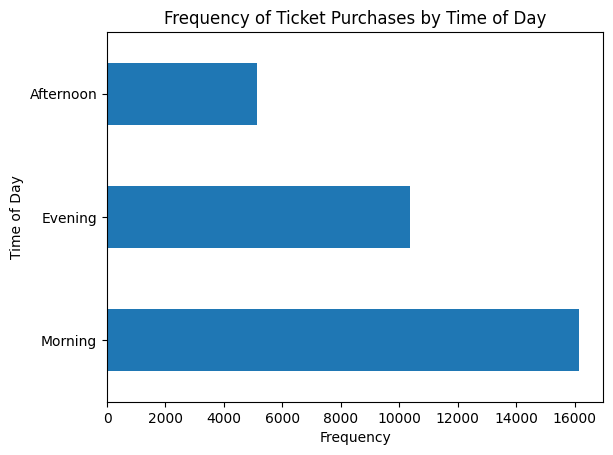

In [23]:

frequentPurchase.plot(kind='barh')
plt.title('Frequency of Ticket Purchases by Time of Day')
plt.ylabel('Time of Day')
plt.xlabel('Frequency')
plt.show()

### 15.	Are delays more common during weekends compared to weekdays?

In [24]:
# Monday 0, Tuesday 1, Wednesday 2, Thursday 3, Friday 4, Saturday 5, Sunday 6
def weeks(x):
    if x.dayofweek <= 4:
        return "Weekdays"
    else:
        return "Weekends"

In [25]:
df['Weeks'] = df['Date of Purchase'].apply(weeks)
delayed = df[df['Journey Status'] == 'Delayed']
delayed.groupby('Weeks')['Journey Status'].value_counts().unstack()

Journey Status,Delayed
Weeks,
Weekdays,1642
Weekends,650
